<a href="https://colab.research.google.com/github/rca32/pythoncs_2019/blob/master/14_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/rca32/pythoncs_2019.git data
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Cloning into 'data'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 79 (delta 33), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (79/79), done.


# Pivoting data

In [0]:
excelample = pd.DataFrame({'월별': ["1월", "1월", "1월", "1월", 
                                  "2월", "2월", "2월", "2월", 
                                  "3월", "3월", "3월", "3월"],
                   '카테고리': ["교통비", "식품비", "기본경비", "오락",
                                "교통비", "식품비", "기본경비", "오락",
                                "교통비", "식품비", "기본경비", "오락"],
                   '합계': [74., 235., 175., 100., 115., 240., 225., 125., 90., 260., 200., 120.]})

In [0]:
excelample.to_excel('./excelample.xlsx')

In [0]:
excelample_pivot = excelample.pivot(index="카테고리", columns="월별", values="합계")
excelample_pivot

월별,1월,2월,3월
카테고리,,,
교통비,74.0,115.0,90.0
기본경비,175.0,225.0,200.0
식품비,235.0,240.0,260.0
오락,100.0,125.0,120.0


In [0]:
# sum 
excelample_pivot.sum()
excelample_pivot.sum(axis=1)

카테고리
교통비     279.0
기본경비    600.0
식품비     735.0
오락      345.0
dtype: float64

## pivot... 피봇은 Data 의 재정렬

In [0]:
df = pd.DataFrame({'Fare': [7.25, 71.2833, 51.8625, 30.0708, 7.8542, 13.0],
                   'Pclass': [3, 1, 1, 2, 3, 2],
                   'Sex': ['male', 'female', 'male', 'female', 'female', 'male'],
                   'Survived': [0, 1, 0, 1, 0, 1]})

In [0]:
df

,Fare,Pclass,Sex,Survived
0,7.2500,3,male,0
1,71.2833,1,female,1
2,51.8625,1,male,0
3,30.0708,2,female,1
4,7.8542,3,female,0
5,13.0000,2,male,1


In [0]:
df.pivot(index='Pclass', columns='Sex', values='Fare')

Sex,female,male
Pclass,,
1,71.2833,51.8625
2,30.0708,13.0000
3,7.8542,7.2500


In [0]:
df.pivot(index='Pclass', columns='Sex', values='Survived')

Sex,female,male
Pclass,,
1,1,0
2,1,1
3,0,0


## 여기까진..... 좋은데..


In [0]:
df = pd.read_csv("data/titanic.csv")

In [0]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
df.pivot(index='Sex', columns='Pclass', values='Fare')

In [0]:
df.loc[[1, 3], ["Sex", 'Pclass', 'Fare']]

,Sex,Pclass,Fare
1,female,1,71.2833
3,female,1,53.1000


In [0]:
df.pivot_table(index='Sex', columns='Pclass', values='Fare')

Pclass,1,2,3
Sex,,,
female,106.125798,21.970121,16.118810
male,67.226127,19.741782,12.661633


In [0]:
df.pivot_table(index='Sex', columns='Pclass', values='Fare', aggfunc='max')

Pclass,1,2,3
Sex,,,
female,512.3292,65.0,69.55
male,512.3292,73.5,69.55


In [0]:
df.pivot_table(index='Sex', columns=['Pclass'], 
               values='Fare', aggfunc='count')

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [0]:
pd.crosstab(index=df['Sex'], columns=df['Pclass'])

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


 # EXERCISE
 
 생존률로 피봇 테이블를 만드시요 (Pclass vs Sex)


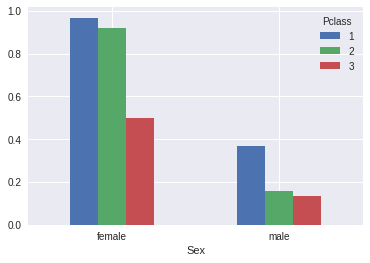

In [0]:
df.groupby(['Sex','Pclass']).mean()['Survived'].unstack()


In [0]:
df['유아'] = df['Age'] <= 10
df.pivot_table(index='유아', columns='Sex',values='Fare', aggfunc='mean')

Sex,female,male
유아,,
False,46.301533,25.078698
True,27.849326,32.862879


# Melt

# pivot 반대..
https://yoursumbuddy.com/data-normalizer/

In [0]:
pivoted = df.pivot_table(index='Sex', columns='Pclass', values='Fare').reset_index()
pivoted.columns.name = None

In [0]:
pivoted

,Sex,1,2,3
0,female,106.125798,21.970121,16.118810
1,male,67.226127,19.741782,12.661633


In [0]:
pd.melt(pivoted)

,variable,value
0,Sex,female
1,Sex,male
2,1,106.126
3,1,67.2261
4,2,21.9701
5,2,19.7418
6,3,16.1188
7,3,12.6616


In [0]:
pd.melt(pivoted, id_vars=['Sex'])

,Sex,variable,value
0,female,1,106.125798
1,male,1,67.226127
2,female,2,21.970121
3,male,2,19.741782
4,female,3,16.118810
5,male,3,12.661633


# `stack`   `unstack`

In [0]:
df = pd.DataFrame({'A':['one', 'one', 'two', 'two'], 
                   'B':['a', 'b', 'a', 'b'], 
                   'C':range(4)})
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


In [0]:
df = df.set_index(['A', 'B'])
df

C
A   B   
one a  0
    b  1
two a  2
    b  3

In [0]:
result = df['C'].unstack()
result.columns.name = None
result

,a,b
A,,
one,0,1
two,2,3


In [0]:
df = result.stack()
df

A     
one  a    0
     b    1
two  a    2
     b    3
dtype: int64

# merge

https://datascienceschool.net/view-notebook/7002e92653434bc88c8c026c3449d27b/

![대체 텍스트](https://t1.daumcdn.net/cfile/tistory/2623B333576CC00037)

In [0]:
df1 = pd.DataFrame({
    '고객번호': [1001, 1002, 1003, 1004, 1005, 1006, 1007],
    '이름': ['둘리', '도우너', '또치', '길동', '희동', '마이콜', '영희']
}, columns=['고객번호', '이름'])
df1

,고객번호,이름
0,1001,둘리
1,1002,도우너
2,1003,또치
3,1004,길동
4,1005,희동
5,1006,마이콜
6,1007,영희


In [0]:
df2 = pd.DataFrame({
    '고객번호': [1001, 1001, 1005, 1006, 1008, 1001],
    '금액': [10000, 20000, 15000, 5000, 100000, 30000]
}, columns=['고객번호', '금액'])
df2

,고객번호,금액
0,1001,10000
1,1001,20000
2,1005,15000
3,1006,5000
4,1008,100000
5,1001,30000


In [0]:
pd.merge(df1, df2)
#inner join


,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


In [0]:
pd.merge(df1, df2, how='outer')

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN
9,1008,NaN,100000.0


In [0]:
pd.merge(df1, df2, how='left')

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN


In [0]:
pd.merge(df1, df2, how='right')

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000
5,1008,NaN,100000


In [0]:
df1 = pd.DataFrame({
    '품종': ['setosa', 'setosa', 'virginica', 'virginica'],
    '꽃잎길이': [1.4, 1.3, 1.5, 1.3]},
    columns=['품종', '꽃잎길이'])
df1

,품종,꽃잎길이
0,setosa,1.4
1,setosa,1.3
2,virginica,1.5
3,virginica,1.3


In [0]:
df2 = pd.DataFrame({
    '품종': ['setosa', 'virginica', 'virginica', 'versicolor'],
    '꽃잎너비': [0.4, 0.3, 0.5, 0.3]},
    columns=['품종', '꽃잎너비'])
df2

,품종,꽃잎너비
0,setosa,0.4
1,virginica,0.3
2,virginica,0.5
3,versicolor,0.3


In [0]:
pd.merge(df1, df2)

,품종,꽃잎길이,꽃잎너비
0,setosa,1.4,0.4
1,setosa,1.3,0.4
2,virginica,1.5,0.3
3,virginica,1.5,0.5
4,virginica,1.3,0.3
5,virginica,1.3,0.5


In [0]:
df1 = pd.DataFrame({
    '고객명': ['춘향', '춘향', '몽룡'],
    '날짜': ['2018-01-01', '2018-01-02', '2018-01-01'],
    '데이터': ['20000', '30000', '100000']})
df1

,고객명,날짜,데이터
0,춘향,2018-01-01,20000
1,춘향,2018-01-02,30000
2,몽룡,2018-01-01,100000


In [0]:
df2 = pd.DataFrame({
    '고객명': ['춘향', '몽룡'],
    '데이터': ['여자', '남자']})
df2

,고객명,데이터
0,춘향,여자
1,몽룡,남자


In [0]:
pd.merge(df1, df2)

,고객명,날짜,데이터


In [0]:
pd.merge(df1, df2, on='고객명')

,고객명,날짜,데이터_x,데이터_y
0,춘향,2018-01-01,20000,여자
1,춘향,2018-01-02,30000,여자
2,몽룡,2018-01-01,100000,남자


In [0]:
df1 = pd.DataFrame({
    '이름': ['영희', '철수', '철수'],
    '성적': [1, 2, 3]})
df1

,성적,이름
0,1,영희
1,2,철수
2,3,철수


In [0]:
df2 = pd.DataFrame({
    '성명': ['영희', '영희', '철수'],
    '성적2': [4, 5, 6]})
df2

,성명,성적2
0,영희,4
1,영희,5
2,철수,6


In [0]:
pd.merge(df1, df2, left_on='이름', right_on="성명")

,성적,이름,성명,성적2
0,1,영희,영희,4
1,1,영희,영희,5
2,2,철수,철수,6
3,3,철수,철수,6


In [0]:
df1 = pd.DataFrame({
    '도시': ['서울', '서울', '서울', '부산', '부산'],
    '연도': [2000, 2005, 2010, 2000, 2005],
    '인구': [9853972, 9762546, 9631482, 3655437, 3512547]})
df1

,도시,연도,인구
0,서울,2000,9853972
1,서울,2005,9762546
2,서울,2010,9631482
3,부산,2000,3655437
4,부산,2005,3512547


In [0]:
df2 = pd.DataFrame(
    np.arange(12).reshape((6, 2)),
    index=[['부산', '부산', '서울', '서울', '서울', '서울'],
           [2000, 2005, 2000, 2005, 2010, 2015]],
    columns=['데이터1', '데이터2'])
df2

데이터1  데이터2
부산 2000     0     1
   2005     2     3
서울 2000     4     5
   2005     6     7
   2010     8     9
   2015    10    11

In [0]:
pd.merge(df1, df2, left_on=['도시', '연도'], right_index=True)

,도시,연도,인구,데이터1,데이터2
0,서울,2000,9853972,4,5
1,서울,2005,9762546,6,7
2,서울,2010,9631482,8,9
3,부산,2000,3655437,0,1
4,부산,2005,3512547,2,3
